# Week 3 Assignment
### choose features and observations, make some statistics and calculations for understanding dataset

In [1]:
# import necessary modules
import pandas as pd
import numpy as np

In [2]:
# load NASA Global Martian Crater Database into `nasa_df` dataframe
nasa_df = pd.read_csv('marscrater_pds.csv')

# print head of `nasa_df` 
nasa_df.head()

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [3]:
# repair broken label `CRATER_ID` in the original dataset
cols = list(nasa_df.columns)
cols[0] = 'CRATER_ID'
nasa_df.columns = cols

### Step 1. Extract fields from original dataset  which need for our resarch:
- CRATER_ID
- LATITUDE_CIRCLE_IMAGE
- LATITUDE_CIRCLE_IMAGE
- DIAM_CIRCLE_IMAGE
- DEPTH_RIMFLOOR_TOPOG

In [4]:
# create new dataframe `data` from `nasa_df`
data = nasa_df[['CRATER_ID', 'LATITUDE_CIRCLE_IMAGE', 'LATITUDE_CIRCLE_IMAGE', 
         'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LATITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
0,01-000000,84.367,84.367,82.10,0.22
1,01-000001,72.760,72.760,82.02,1.97
2,01-000002,69.244,69.244,79.63,0.09
3,01-000003,70.107,70.107,74.81,0.13
4,01-000004,77.996,77.996,73.53,0.11


### Step 2. Make descriptive statistics and clean dataset

In [5]:
# check for positive diameter and depth
print ('QTY of bad diameters = ',data[data['DIAM_CIRCLE_IMAGE'] <= 0]['DIAM_CIRCLE_IMAGE'].count())
print ('QTY of bad depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0]['DEPTH_RIMFLOOR_TOPOG'].count())

QTY of bad diameters =  0
QTY of bad depth =  307539


#### We see too many `'bad'` magnitudes of the crater depth. Let's look at this column more carefully


In [6]:
# count negative depth
print ('QTY of negstive depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] < 0]['DEPTH_RIMFLOOR_TOPOG'].count())

# count zero-value depth
print ('QTY of negative depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] == 0]['DEPTH_RIMFLOOR_TOPOG'].count())

QTY of negstive depth =  10
QTY of negative depth =  307529


#### Craters with negative & zero depth are hills or undefined and we have to exclude this observations from research

In [7]:
# store indexes of raw with negative  and zero depth
negative_zero_indexes = list(data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0 ].index)

# remove this raw from `data`
data = data.drop(negative_zero_indexes)

print ('QTY of zero/negative depth = {}'.format(data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0]['DEPTH_RIMFLOOR_TOPOG'].count()))

QTY of zero/negative depth = 0


#### Quantiles below show  that  90% of craters belong to `not extra large` craters which conform `Newton’s approximation for the impact depth` (  [see CodeBook](https://github.com/sergei8/Project/blob/master/mars-craters/Mars_Surface_Study.pdf) ) .

In [8]:
data[['DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG']].quantile(np.arange(0, 1, .1))

,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
0.0,1.060,0.01
0.1,2.550,0.06
0.2,3.320,0.10
0.3,3.890,0.14
0.4,4.720,0.20
0.5,5.880,0.27
0.6,7.560,0.35
0.7,10.160,0.46
0.8,14.860,0.60
0.9,24.917,0.84


In [9]:
# some usefull statistics
data[['DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG']].describe()

,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
count,76804.000000,76804.000000
mean,11.061201,0.379514
std,15.619762,0.360978
min,1.060000,0.010000
25%,3.580000,0.120000
50%,5.880000,0.270000
75%,12.150000,0.520000
max,512.750000,4.950000


In [10]:
# remove all raws with diameter > 50km (extra large meteors/craters)
data = data.drop(data[data.DIAM_CIRCLE_IMAGE > 50].index)

#### Make a new future: Depth / Diameter which we will use for analyse.

In [11]:
data['DEPTH_DIAM_RATIO'] = data['DEPTH_RIMFLOOR_TOPOG'] / data['DIAM_CIRCLE_IMAGE']
data[['CRATER_ID','DEPTH_DIAM_RATIO']].head()

,CRATER_ID,DEPTH_DIAM_RATIO
13,01-000013,0.003214
14,01-000014,0.002832
15,01-000015,0.021704
16,01-000016,0.001858
17,01-000017,0.000847


### Visualize and exploratory analyse of the dataset

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

### Show distribution of diameter and depth variables.

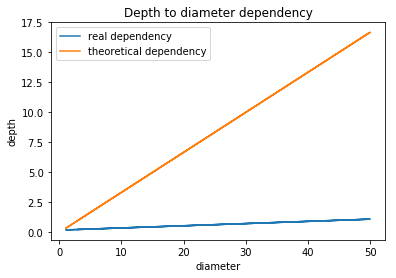

In [13]:
# find polynomials coefficients and plot dependancies graph
coef = np.polyfit(data['DIAM_CIRCLE_IMAGE'], data['DEPTH_RIMFLOOR_TOPOG'], deg=1)
plt.plot(data['DIAM_CIRCLE_IMAGE'], coef[0] * data['DIAM_CIRCLE_IMAGE'] + coef[1], 
         '-', label='real dependency' )

plt.plot(data['DIAM_CIRCLE_IMAGE'],data['DIAM_CIRCLE_IMAGE']/3.,'-', label='theoretical dependency')

plt.legend(loc=0)
plt.xlabel('diameter')
plt.ylabel('depth')
plt.title('Depth to diameter dependency')

plt.show()

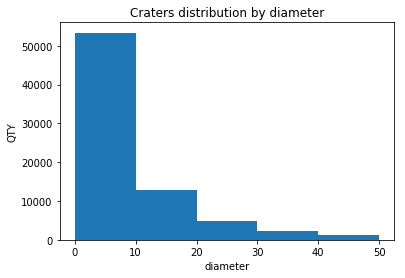

,count,mean,std,min,25%,50%,75%,max
DIAM_CIRCLE_IMAGE,,,,,,,,
"(0, 10]",53390.0,4.759639,2.128546,1.06,3.19,4.250,6.1700,10.0
"(10, 20]",12850.0,14.049859,2.827887,10.01,11.57,13.590,16.2600,20.0
"(20, 30]",4918.0,24.371484,2.856299,20.01,21.83,24.100,26.6900,30.0
"(30, 40]",2338.0,34.498725,2.855197,30.01,31.97,34.235,36.8925,40.0
"(40, 50]",1307.0,44.517743,2.854560,40.02,41.99,44.210,46.8600,50.0


In [14]:
bins = [0, 10, 20, 30, 40, 50]
plt.hist(data['DIAM_CIRCLE_IMAGE'],bins)

plt.xlabel('diameter')
plt.ylabel('QTY')
plt.title('Craters distribution by diameter')

plt.show()

groups = data.DIAM_CIRCLE_IMAGE.groupby(pd.cut(data.DIAM_CIRCLE_IMAGE, bins), sort=True)
groups.describe()

In [19]:
np.arange(0, 5, .5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

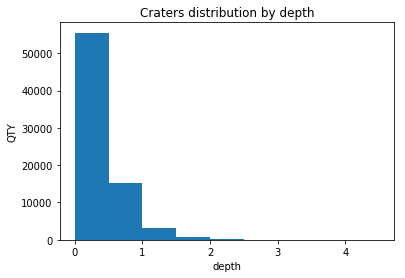

In [20]:
bins =  [0, 1, 2, 3, 4, 5]
bins = np.arange(0, 5, .5)
plt.hist(data['DEPTH_RIMFLOOR_TOPOG'], bins)
plt.xlabel('depth')
plt.ylabel('QTY')
plt.title('Craters distribution by depth')

plt.show()

In [93]:
groups = data.DEPTH_RIMFLOOR_TOPOG.groupby(pd.cut(data.DEPTH_RIMFLOOR_TOPOG, bins), sort=True)
groups.describe()

,count,mean,std,min,25%,50%,75%,max
DEPTH_RIMFLOOR_TOPOG,,,,,,,,
"(0, 1]",70979.0,0.309767,0.239114,0.01,0.110,0.24,0.460,1.00
"(1, 2]",3714.0,1.287229,0.238205,1.01,1.100,1.22,1.420,2.00
"(2, 3]",107.0,2.159065,0.132363,2.01,2.065,2.12,2.220,2.57
"(3, 4]",2.0,3.090000,0.014142,3.08,3.085,3.09,3.095,3.10
"(4, 5]",1.0,4.750000,NaN,4.75,4.750,4.75,4.750,4.75


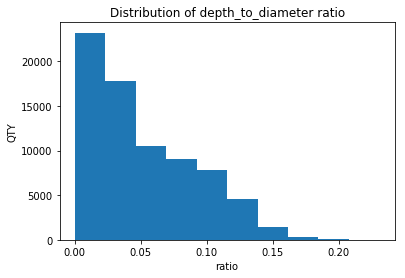

In [113]:
plt.hist(data['DEPTH_DIAM_RATIO'], bins=10)

plt.xlabel('ratio')
plt.ylabel('QTY')
plt.title('Distribution of depth_to_diameter ratio')

plt.show()

In [126]:
groups = data.DEPTH_DIAM_RATIO.groupby(pd.cut(data.DEPTH_DIAM_RATIO, bins=np.arange(0, 0.3, 0.05)), sort=True)
groups.describe()

,count,mean,std,min,25%,50%,75%,max
DEPTH_DIAM_RATIO,,,,,,,,
"(0.0, 0.05]",42867.0,0.023061,0.012603,0.000249,0.012644,0.021739,0.032404,0.050000
"(0.05, 0.1]",20604.0,0.074002,0.014568,0.050000,0.061117,0.073563,0.086538,0.100000
"(0.1, 0.15]",10483.0,0.118615,0.012846,0.100000,0.107595,0.116667,0.127778,0.150000
"(0.15, 0.2]",831.0,0.163592,0.011949,0.150082,0.153846,0.159817,0.170292,0.200000
"(0.2, 0.25]",18.0,0.208706,0.009543,0.200418,0.202365,0.205418,0.208322,0.230769


### Conclusion
#### Plots and stat. tables above shows that real dependency has positive slope , but less then theoretical. It's explains by additional factors: surface erosion and soil density, but confirms our assume about correlation between diameter and depth

In [1]:
from IPython.core.display import Image


In [4]:
%who

Image	 json	 yapf_reformat	 


In [5]:
a=[1,2,3]
whos

NameError: name 'whos' is not defined

In [6]:
whos

Variable        Type        Data/Info
-------------------------------------
Image           type        <class 'IPython.core.display.Image'>
a               list        n=3
json            module      <module 'json' from '/Lib<...>hon3.6/json/__init__.py'>
yapf_reformat   function    <function yapf_reformat at 0x1064d7400>


In [7]:
locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'from IPython.core.display import Image',
  "get_ipython().run_line_magic('whos', '')",
  "get_ipython().run_line_magic('pinfo', 'whos')",
  "get_ipython().run_line_magic('who', '')",
  'a=[1,2,3]\nwhos',
  "get_ipython().run_line_magic('whos', '')",
  'locals()'],
 '_oh': {},
 '_dh': ['/Volumes/HDD/MOOC/Data Management and Visualization ЗАРЕГИСТРИРОВАН/Project/mars-craters'],
 'In': ['',
  'from IPython.core.display import Image',
  "get_ipython().run_line_magic('whos', '')",
  "get_ipython().run_line_magic('pinfo', 'whos')",
  "get_ipython().run_line_magic('who', '')",
  'a=[1,2,3]\nwhos',
  "get_ipython().run_line_magic('whos', '')",
  'locals()'],
 'Out': {},
 'get_ipython': <bound method InteractiveShell.ge

In [8]:
locals?

In [9]:
%connect_info

{
  "shell_port": 51114,
  "iopub_port": 51115,
  "stdin_port": 51116,
  "control_port": 51117,
  "hb_port": 51118,
  "ip": "127.0.0.1",
  "key": "399b0c1a-64560ec65a6f4eac871a240e",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-2f4a5064-6678-4e95-8f4a-a6063dc3094c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [10]:
%qtconsole

In [ ]:
%debug